In [8]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

city_df.head()
# Combine the data into a single dataset

# Display the data table for preview

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [7]:
city_ride = pd.merge(ride_df, city_df, on='city')
city_ride.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [9]:
# 1. Obtain the x and y coordinates for each of the three city types

#create Dataframe with average fair, total rides, and merge it to first dataframe to get data by city
#required: average fair, total number of rides, by city

#average fair by city = groupby of city/fair + mean
average_fair = city_ride.groupby('city')['fare'].mean()
#total number of rides = groupby of city/ride ids. + total count
total_rides = city_ride.groupby('city')['ride_id'].count()

new_df = pd.DataFrame({"Total Number of Rides": total_rides, "Average Fair": average_fair})
#new_df

#merge to city_ride
aggregate_df = pd.merge(new_df, city_ride, on='city')
#aggregate_df

#locate by city type
urban = aggregate_df.loc[aggregate_df['type'] == 'Urban']
urban.head()
rural = aggregate_df.loc[aggregate_df['type'] == 'Rural']
rural.head()
suburban = aggregate_df.loc[aggregate_df['type'] == 'Suburban']
suburban.head()

,city,Total Number of Rides,Average Fair,date,fare,ride_id,driver_count,type
40,Barronchester,16,36.4225,2018-01-27 03:08:01,27.79,6653622887913,11,Suburban
41,Barronchester,16,36.4225,2018-05-05 04:03:11,30.38,2281522828169,11,Suburban
42,Barronchester,16,36.4225,2018-04-25 19:11:43,36.13,2660177707065,11,Suburban
43,Barronchester,16,36.4225,2018-03-31 06:05:30,44.24,1252888806772,11,Suburban
44,Barronchester,16,36.4225,2018-03-02 23:36:58,36.49,4031573980778,11,Suburban


<function matplotlib.pyplot.show(*args, **kw)>

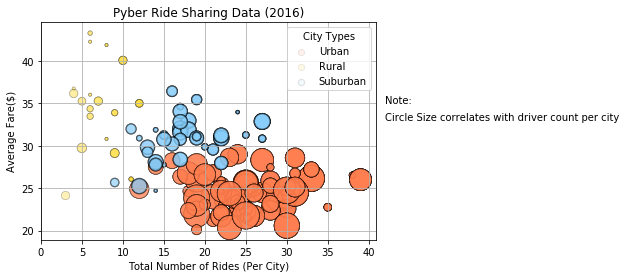

In [12]:
# 2. Build the scatter plots for each city types

#urbanscatter - coral
plt.scatter(urban['Total Number of Rides'], 
            urban['Average Fair'], 
            s = urban['driver_count']*10,
            alpha = 0.1,
            c = 'coral',
            edgecolors = 'black',
            linewidths = 0.7
           )

#ruralscatter - gold
plt.scatter(rural['Total Number of Rides'], 
            rural['Average Fair'], 
            s = rural['driver_count']*10,
            alpha = 0.1,
            edgecolors = 'black',
            c = '#FFD700',
            linewidths = 0.7
           )

#suburbanscatter - light blue
plt.scatter(suburban['Total Number of Rides'], 
            suburban['Average Fair'], 
            s = suburban['driver_count']*10,
            alpha = 0.1,
            edgecolors = 'black',
            c = '#87cefa',
            linewidths = 1.2
           )

# 3. Graph Properties

#tick locations
plt.xticks(np.arange(0, 41, 5))
plt.yticks(np.arange(20, 45, 5))

#labels
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare($)')

#title
plt.title('Pyber Ride Sharing Data (2016)')

#show grid
plt.grid(b=None, which='major', axis='both')

#show legend
legend = plt.legend(labels=['Urban', 'Rural', 'Suburban'], loc='best', markerscale=0.7, title='City Types')
legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = [40]

#show note
#text(x, y, s)
plt.text(42, 35, 'Note:')
plt.text(42, 33, 'Circle Size correlates with driver count per city')

plt.savefig('Pyber Ride Sharing Data.png')

plt.show

## Total Fares by City Type

<function matplotlib.pyplot.show(*args, **kw)>

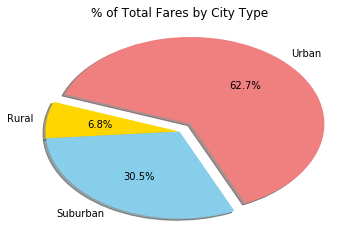

In [13]:
# Calculate Type Percents

#create dataframe for fares, get it in % form
total_fare = aggregate_df.groupby('type')['fare'].sum()
total_fare_df = pd.DataFrame({'Total Fare': total_fare})
#total_fare_df

#get pct
total_fare_df['Fare Pct'] = total_fare_df['Total Fare'] / total_fare_df['Total Fare'].sum() * 100
#total_fare_df

#Build Pie Chart

colors = ('gold', 'skyblue', 'lightcoral')


total_fare_df.plot(y = 'Total Fare',
                   label = '',
                   kind = 'pie',
                   explode = (0, 0, 0.12),
                   startangle = 160,
                   labels = total_fare_df.index,
                   autopct = '%1.1f%%',
                   colors = colors,
                   title = '% of Total Fares by City Type', legend = False,
                   shadow = True)

plt.savefig('%Total Fares by City Type.png')
plt.show()


## Total Rides by City Type

<function matplotlib.pyplot.show(*args, **kw)>

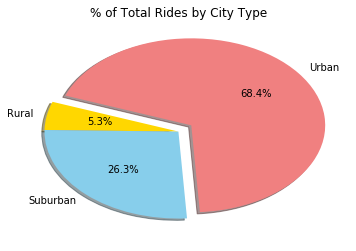

In [14]:
#create dataframe for rides by id, get it in % form
total_rides = aggregate_df.groupby('type')['ride_id'].count()
total_rides_df = pd.DataFrame({'Total Rides': total_rides})
#total_rides_df

#get pct
total_rides_df['Ride Pct'] = total_rides_df['Total Rides'] / total_rides_df['Total Rides'].sum() * 100
#total_rides_df

#Build Pie Chart

colors = ('gold', 'skyblue', 'lightcoral')


total_rides_df.plot(y = 'Total Rides',
                   label = '',
                   kind = 'pie',
                   explode = (0, 0, 0.12),
                   startangle = 160,
                   labels = total_rides_df.index,
                   autopct = '%1.1f%%',
                   colors = colors,
                   title = '% of Total Rides by City Type', legend = False,
                   shadow = True)

plt.savefig('%Total Rides by City Type.png')
plt.show()

## Total Drivers by City Type

<function matplotlib.pyplot.show(*args, **kw)>

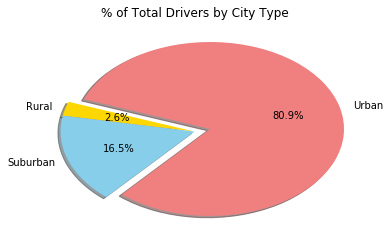

In [15]:
#create dataframe for drivers as sum from original city_data, get it in % form
total_drivers = city_df.groupby('type')['driver_count'].sum()
total_drivers_df = pd.DataFrame({'Total Drivers': total_drivers})
#total_drivers_df

#get pct
total_drivers_df['Drivers Pct'] = total_drivers_df['Total Drivers'] / total_drivers_df['Total Drivers'].sum() * 100
#total_drivers_df

#Build Pie Chart

colors = ('gold', 'skyblue', 'lightcoral')


total_drivers_df.plot(y = 'Total Drivers',
                   label = '',
                   kind = 'pie',
                   explode = (0, 0, 0.12),
                   startangle = 160,
                   labels = total_drivers_df.index,
                   autopct = '%1.1f%%',
                   colors = colors,
                   title = '% of Total Drivers by City Type',
                   shadow = True,
                   legend = False   
                     )

plt.savefig('%Total Drivers by City Type.png')
plt.show